In [1]:
import pandas as pd
df = pd.read_csv("c:/data/pima/data.csv")
df

C:\Users\user\AppData\Local\Temp\ipykernel_14048\1719186270.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
X = df[df.columns[0:-1]]
y = df["outcome"]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train, y_train)
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

1.0
0.7012987012987013


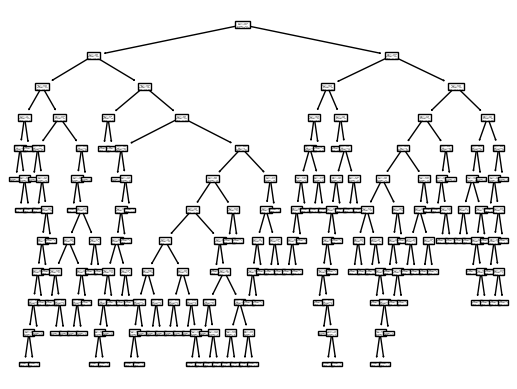

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(model1)
plt.show()

In [ ]:
# max_leaf_nodes : leaf_node(자식 노드가 없는 노드)의 최대 개수
# min_samples_leaf : leaf_node가 되기 위한 최소한의 샘플 개수
# min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수

0.7296416938110749
0.7597402597402597


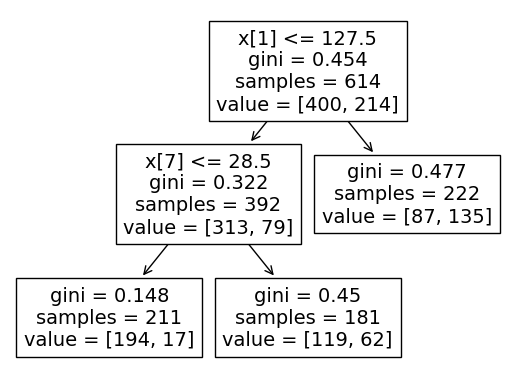

In [6]:
model2 = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

tree.plot_tree(model2)
plt.show()

0.7915309446254072
0.7272727272727273


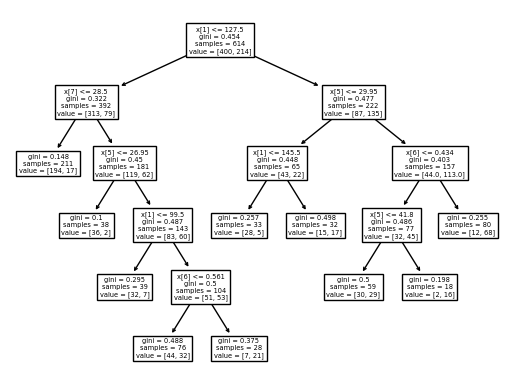

In [7]:
model3 = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
model3.fit(X_train, y_train)
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))

tree.plot_tree(model3)
plt.show()

In [10]:
from sklearn.tree import export_text
# 의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model3, feature_names=list(X_train.columns))
print(tree_rules)

|--- glucose <= 127.50
|   |--- age <= 28.50
|   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- bmi <= 26.95
|   |   |   |--- class: 0
|   |   |--- bmi >  26.95
|   |   |   |--- glucose <= 99.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  99.50
|   |   |   |   |--- Diabetes_Pedigree_Function <= 0.56
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Diabetes_Pedigree_Function >  0.56
|   |   |   |   |   |--- class: 1
|--- glucose >  127.50
|   |--- bmi <= 29.95
|   |   |--- glucose <= 145.50
|   |   |   |--- class: 0
|   |   |--- glucose >  145.50
|   |   |   |--- class: 1
|   |--- bmi >  29.95
|   |   |--- Diabetes_Pedigree_Function <= 0.43
|   |   |   |--- bmi <= 41.80
|   |   |   |   |--- class: 0
|   |   |   |--- bmi >  41.80
|   |   |   |   |--- class: 1
|   |   |--- Diabetes_Pedigree_Function >  0.43
|   |   |   |--- class: 1



In [11]:
# tree_ : 트리의 루트 노드
n_nodes = model3.tree_.node_count
print('전체 노드 개수 : ', n_nodes)
threshold = model3.tree_.threshold
print('노드의 임계값 : ' , threshold)

전체 노드 개수 :  19
노드의 임계값 :  [127.5         28.5         29.94999981  -2.          26.94999981
 145.5          0.434       -2.          99.5         -2.
   0.56099999  41.79999924  -2.          -2.          -2.
  -2.          -2.          -2.          -2.        ]
